### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 


## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Интеллектуальный анализ данных



##### Студент:  Липатникова Марина
##### Группа:   НФИбд-02-19



## Москва 2022
***


#### Задание на лабораторную работу №4



Для закрепленного за Вами варианта лабораторной работы:

    1.	Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса. 

    2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если количество различных меток классов превышает 4, то уменьшите количество классов.

    3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.

    4.	Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

    5.  Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

    6.  Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок. 

    7.  Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.

    8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:
    * наивного байесовского классификатора  
    * классификатора метода К ближайших соседей для значения К, определенного в п. 6.

    9.  Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.

    10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 





# Индивидуальное задание



Лабораторная работа 4 – Вариант 3 

Arrhythmia Data Set 

Название файла: arrhythmia.data 

Ссылка: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Первый признак: Age (столбец No 1) 

Второй признак: Weight (столбец No 4) 

Третий признак: Height (столбец No 3) 

Класс: Class code (столбец No 280 последний) 

Метод обработки пропущенных значений – среднее значение класса 

Метод нормализации признаков – нормировка по норме L1 

Алгоритм снижения размерности данных – отбор на основе важности признаков (ExtraTreesClassifier) 

Метод валидации модели – стратифицированная кросс-валидация по 10 блокам 

Показатель качества модели – полнота (recall) 

1.	Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса. 

In [1]:

url = \
    "https://archive.ics.uci.edu/ml/"+\
    "machine-learning-databases/arrhythmia/arrhythmia.data"


In [2]:

import pandas as pd

data = pd.read_csv(url, header=None)

data


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [3]:

df = data.loc[:,[0, 3, 2, 279]].copy()
df.columns = ['Age', 'Weight', 'Height', 'Class code']
df


,Age,Weight,Height,Class code
0,75,80,190,8
1,56,64,165,6
2,54,95,172,10
3,55,94,175,1
4,75,80,190,7
...,...,...,...,...
447,53,70,160,1
448,37,85,190,10
449,36,68,166,2
450,32,55,155,1


2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если количество различных меток классов превышает 4, то уменьшите количество классов.

В датасете используется знак "?" для пропущенных значений.

In [4]:

import numpy as np
import collections


In [5]:

df = df.replace('?', np.nan)


In [6]:

df.isnull().sum(axis=0)


Age           0
Weight        0
Height        0
Class code    0
dtype: int64

In [7]:

c = df['Class code']
collections.Counter(c)


Counter({8: 2,
         6: 25,
         10: 50,
         1: 245,
         7: 3,
         14: 4,
         3: 15,
         16: 22,
         2: 44,
         4: 15,
         5: 13,
         9: 9,
         15: 5})

1, 10, 2, 6 - классы, которые имеют наибольшее количество записей. Т.к. в датасете 452 строчки, а класс 1 имеет почти 250 значений, можно было бы их удалить. Но будем объединять. 
К 10 - 14, 15, 16. 
К 6 - 7, 8, 9. 
К 2 - 3, 4, 5.

In [8]:

df2 = df.copy()
df2


,Age,Weight,Height,Class code
0,75,80,190,8
1,56,64,165,6
2,54,95,172,10
3,55,94,175,1
4,75,80,190,7
...,...,...,...,...
447,53,70,160,1
448,37,85,190,10
449,36,68,166,2
450,32,55,155,1


In [9]:

df2['Class code'] = df2['Class code'].replace(3, 2)
df2['Class code'] = df2['Class code'].replace(4, 2)
df2['Class code'] = df2['Class code'].replace(5, 2)
df2['Class code'] = df2['Class code'].replace(7, 6)
df2['Class code'] = df2['Class code'].replace(8, 6)
df2['Class code'] = df2['Class code'].replace(9, 6)
df2['Class code'] = df2['Class code'].replace(14, 10)
df2['Class code'] = df2['Class code'].replace(15, 10)
df2['Class code'] = df2['Class code'].replace(16, 10)
df2


,Age,Weight,Height,Class code
0,75,80,190,6
1,56,64,165,6
2,54,95,172,10
3,55,94,175,1
4,75,80,190,6
...,...,...,...,...
447,53,70,160,1
448,37,85,190,10
449,36,68,166,2
450,32,55,155,1


In [10]:

c = df2['Class code']
collections.Counter(c)


Counter({6: 39, 10: 81, 1: 245, 2: 87})

3.	Нормализуйте признаки набора данных методом, указанным в индивидуальном задании. 

Метод нормализации признаков – нормировка по норме L1.

In [11]:

from sklearn.preprocessing import Normalizer
X = df2.copy()
X = X.drop(['Class code'],axis=1)
scaler = Normalizer(norm='l1').fit(X)
normalizedX = scaler.transform(X)

print(normalizedX[0:5,:])


[[0.2173913  0.23188406 0.55072464]
 [0.19649123 0.2245614  0.57894737]
 [0.1682243  0.29595016 0.53582555]
 [0.16975309 0.29012346 0.54012346]
 [0.2173913  0.23188406 0.55072464]]


In [12]:

df3 = pd.DataFrame(normalizedX)
df3.columns = ['Age', 'Weight', 'Height']
df3['Class code'] = c
df3


,Age,Weight,Height,Class code
0,0.217391,0.231884,0.550725,6
1,0.196491,0.224561,0.578947,6
2,0.168224,0.295950,0.535826,10
3,0.169753,0.290123,0.540123,1
4,0.217391,0.231884,0.550725,6
...,...,...,...,...
447,0.187279,0.247350,0.565371,1
448,0.118590,0.272436,0.608974,10
449,0.133333,0.251852,0.614815,2
450,0.132231,0.227273,0.640496,1


4.	Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

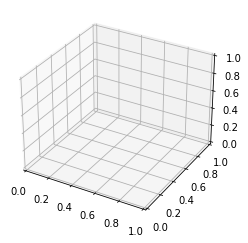

In [13]:

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')


In [14]:

df_p = df3.copy()
df_p.rename(columns={'Class code': 'Class_code'}, inplace=True)
code = np.array(df_p.Class_code)


In [15]:

l = np.unique(code)
l


array([ 1,  2,  6, 10], dtype=int64)

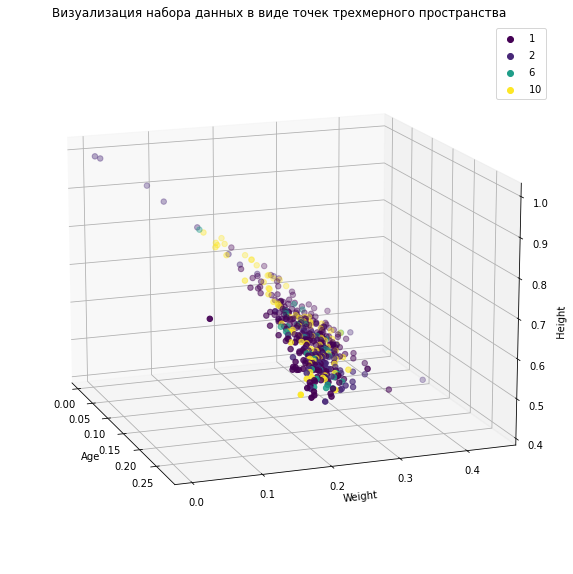

In [16]:

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = df_p.Age
ys = df_p.Weight
zs = df_p.Height
scatter = ax.scatter( xs, ys, zs, c = code, s=30 )
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Height')
ax.view_init( azim=-20, elev=15 );
ax = plt.title("Визуализация набора данных в виде точек трехмерного пространства")
plt.legend(*scatter.legend_elements())


5.	Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 


Алгоритм снижения размерности данных – отбор на основе важности признаков (ExtraTreesClassifier).

In [17]:

df5 = df3.copy()
df5


,Age,Weight,Height,Class code
0,0.217391,0.231884,0.550725,6
1,0.196491,0.224561,0.578947,6
2,0.168224,0.295950,0.535826,10
3,0.169753,0.290123,0.540123,1
4,0.217391,0.231884,0.550725,6
...,...,...,...,...
447,0.187279,0.247350,0.565371,1
448,0.118590,0.272436,0.608974,10
449,0.133333,0.251852,0.614815,2
450,0.132231,0.227273,0.640496,1


In [18]:

from sklearn.ensemble import ExtraTreesClassifier

array = df5.values
X = array[:,0:3] # входные переменные (3 признака)
Y = array[:,3]   # выходная переменная - метки классов

# отбор признаков
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)


[0.33511201 0.3288214  0.33606659]


Мы получили оценки для каждого признака. Чем больше значение оценки, тем важнее признак. Таким образом, согласно данному методу отбора, двумя наиболее важными признаками являются Age и Height.

In [19]:

df_p1 = df5.copy()
df_p1.rename(columns={'Class code': 'Class_code'}, inplace=True)
code = np.array(df_p1.Class_code)
df_p1 = df_p1.drop(['Weight'],axis=1)
df_p1


,Age,Height,Class_code
0,0.217391,0.550725,6
1,0.196491,0.578947,6
2,0.168224,0.535826,10
3,0.169753,0.540123,1
4,0.217391,0.550725,6
...,...,...,...
447,0.187279,0.565371,1
448,0.118590,0.608974,10
449,0.133333,0.614815,2
450,0.132231,0.640496,1


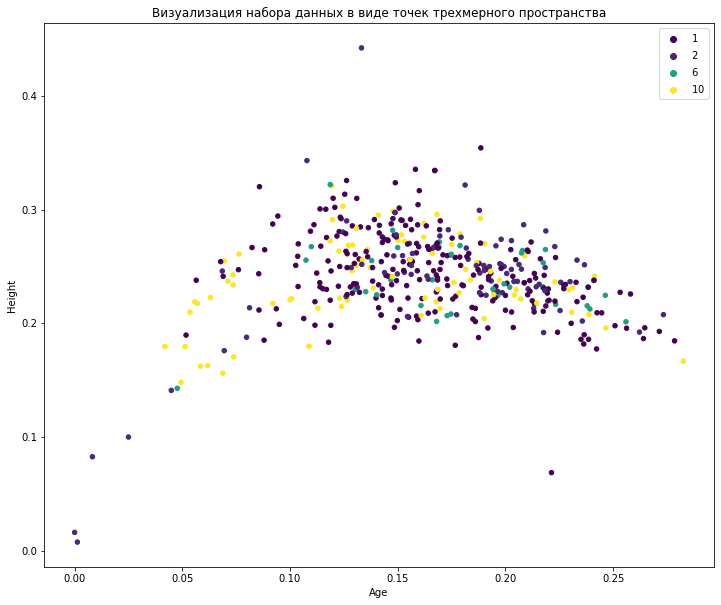

In [20]:

fig = plt.figure(figsize=(12,10))
ax = plt.axes()

xs = df_p.Age
ys = df_p.Weight
scatter = ax.scatter( xs, ys, c = code, s=20 )
ax.set_xlabel('Age')
ax.set_ylabel('Height')

ax = plt.title("Визуализация набора данных в виде точек трехмерного пространства")
plt.legend(*scatter.legend_elements())


6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок. 

In [21]:

X = df5.copy()
y = X['Class code']
X = X.drop(['Class code','Height'],axis=1)


In [22]:
X


,Age,Weight
0,0.217391,0.231884
1,0.196491,0.224561
2,0.168224,0.295950
3,0.169753,0.290123
4,0.217391,0.231884
...,...,...
447,0.187279,0.247350
448,0.118590,0.272436
449,0.133333,0.251852
450,0.132231,0.227273


In [23]:
y


0       6
1       6
2      10
3       1
4       6
       ..
447     1
448    10
449     2
450     1
451     1
Name: Class code, Length: 452, dtype: int64

In [24]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=666)
    

In [25]:

from sklearn.neighbors import KNeighborsClassifier

kNN_clf = KNeighborsClassifier(n_neighbors=26) # создаем классификатор
kNN_clf.fit(X_train, y_train)                 # обучаем классификатор


KNeighborsClassifier(n_neighbors=26)

In [26]:

y_pred = kNN_clf.predict(X_test)


In [27]:

sum(y_pred == y_test)


62

In [28]:

sum(y_pred == y_test) / len(y_test)


0.5486725663716814

In [29]:

best_score = 0.0
best_k = -1
for k in range(1, 60):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print("Лучшее k =", best_k)
print("Лучшая оценка =", best_score)


Лучшее k = 14
Лучшая оценка = 0.5752212389380531


In [30]:

error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

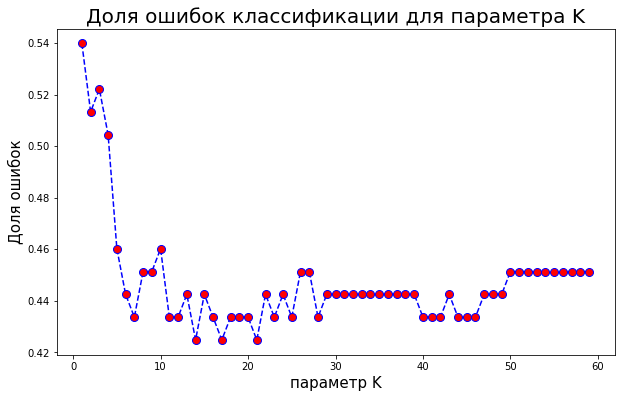

In [31]:

plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Доля ошибок классификации для параметра K', fontsize=20)
plt.xlabel('параметр K',fontsize=15)
plt.ylabel('Доля ошибок',fontsize=15);



Для обоих методов нахождения получилось оптимальное k = 14.


7.	Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.

In [32]:

kNN_clf = KNeighborsClassifier(n_neighbors=14) # создаем классификатор
kNN_clf.fit(X_train, y_train)                 # обучаем классификатор
y_pred = kNN_clf.predict(X_test)


In [33]:

from sklearn.metrics import classification_report,confusion_matrix

conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)


[[59  3  0  0]
 [16  3  0  0]
 [ 8  1  0  0]
 [19  1  0  3]]


In [34]:

print(classification_report(y_test,y_pred, zero_division=0))


              precision    recall  f1-score   support

           1       0.58      0.95      0.72        62
           2       0.38      0.16      0.22        19
           6       0.00      0.00      0.00         9
          10       1.00      0.13      0.23        23

    accuracy                           0.58       113
   macro avg       0.49      0.31      0.29       113
weighted avg       0.58      0.58      0.48       113



In [35]:

print("Доля ошибок неправильной классификации:",round(np.mean(y_pred!=y_test),3))


Доля ошибок неправильной классификации: 0.425


8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:
    * наивного байесовского классификатора  
    * классификатора метода К ближайших соседей для значения К, определенного в п. 6.

In [36]:

X8 = df5.copy()
y8 = X8['Class code']
X8 = X8.drop(['Class code'],axis=1)
X8


,Age,Weight,Height
0,0.217391,0.231884,0.550725
1,0.196491,0.224561,0.578947
2,0.168224,0.295950,0.535826
3,0.169753,0.290123,0.540123
4,0.217391,0.231884,0.550725
...,...,...,...
447,0.187279,0.247350,0.565371
448,0.118590,0.272436,0.608974
449,0.133333,0.251852,0.614815
450,0.132231,0.227273,0.640496


In [37]:

from sklearn.model_selection import train_test_split

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.25, random_state=666)


In [38]:

from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train8,y_train8);


In [39]:


kNN_clf8 = KNeighborsClassifier(n_neighbors=14) # создаем классификатор
kNN_clf8.fit(X_train8, y_train8)                 # обучаем классификатор


KNeighborsClassifier(n_neighbors=14)

9.  Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.

Метод валидации модели – стратифицированная кросс-валидация по 10 блокам 

Показатель качества модели – полнота (recall) 

In [40]:

from sklearn.model_selection import cross_val_score


In [41]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=10)

results_skfold = cross_val_score(nbc, X8, y8, scoring='recall_macro', cv=skfold)
print("Полнота(среднее): %.2f%% \nДисперсия: %.2f%%" % (results_skfold.mean()*100.0, 
                                                results_skfold.var()*100.0))


Полнота(среднее): 29.45% 
Дисперсия: 0.16%


In [42]:

skfold1 = StratifiedKFold(n_splits=10)

results_skfold1 = cross_val_score(kNN_clf8, X8, y8, scoring='recall_macro', cv=skfold1)
print("Полнота(среднее): %.2f%% \nДисперсия: %.2f%%" % (results_skfold1.mean()*100.0, 
                                                results_skfold1.var()*100.0))


Полнота(среднее): 28.67% 
Дисперсия: 0.10%


10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 


Видно, что лучше будет GaussianNB.


In [43]:

df9 = X8.copy()
df9


,Age,Weight,Height
0,0.217391,0.231884,0.550725
1,0.196491,0.224561,0.578947
2,0.168224,0.295950,0.535826
3,0.169753,0.290123,0.540123
4,0.217391,0.231884,0.550725
...,...,...,...
447,0.187279,0.247350,0.565371
448,0.118590,0.272436,0.608974
449,0.133333,0.251852,0.614815
450,0.132231,0.227273,0.640496


In [44]:

y_pred9 = nbc.predict(X8)
np.unique(y_pred9)


array([ 1,  2, 10], dtype=int64)

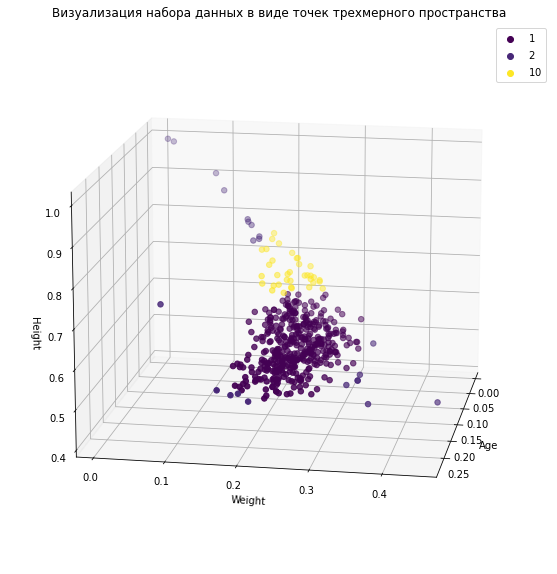

In [45]:

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = df9.Age
ys = df9.Weight
zs = df9.Height
scatter = ax.scatter( xs, ys, zs, c = y_pred9, s=30 )
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Height')
ax.view_init( azim=10, elev=15 );
ax = plt.title("Визуализация набора данных в виде точек трехмерного пространства")
plt.legend(*scatter.legend_elements())
